In [1]:
#Run this in your machine before working with the model to install it:
!pip install pygsl

In [1]:
import nest
nest.set_verbosity('M_ERROR')

from pynestml.frontend.pynestml_frontend import generate_nest_target


generate_nest_target(input_path="models/adex_gamma_E.nestml",   # file containing the neuron model definition
                     suffix="_ml",                               # append to model name to avoid clash with existing model
                     module_name="m1module",                     # enumerate modules; name must end in "module"
                     target_path="tgt",                          # path for auxiliary files generated by NESTML
                     install_path=".")                           # location for generated module; must be "." on EBRAINS

nest.Install('m1module')


#This checks the parameters of the model:
# nest.GetDefaults('adex_gamma_E_ml')

# How to differentiate between neuron types

E = nest.Create('adex_gamma_E_ml', 80)

I = nest.Create('adex_gamma_E_ml', 20, params={'a': 0, 'b':0,'Delta_T': 0.5})


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Oct 15 2023 15:12:16

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Oct 15 2023 15:12:16

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

CMake Warning (dev) at CMakeLists.txt:93 (project):
  cmake_minimum_required() should be called prior to this top-level project()
  call.  Please see the cmake-commands(7) manual for usage documentation of
  both commands.
This warning is for project developers.  Use -Wno-dev to suppress it.

-- The CXX compiler identification is GNU 10.3

In [6]:
import nest.raster_plot
import nest.voltage_trace
import numpy as np
import matplotlib.pyplot as plt
nest.ResetKernel()
nest.resolution = 0.1
%matplotlib inline
rt = nest.GetDefaults('adex_gamma_E_ml', 'receptor_types')

N_E = 80
N_I = 20
VmProbE = np.random.uniform(low=-65, high=-50, size=N_E)
VmProbI= np.random.uniform(low=-65, high=-50, size=N_I)
E1 = nest.Create('adex_gamma_E_ml', 80, params={'V_m': VmProbE})
E2 = nest.Create('adex_gamma_E_ml', 80, params={'V_m': VmProbE})
I1 = nest.Create('adex_gamma_E_ml', 20, params={'a': 0, 'b':0,'Delta_T': 0.5, 'V_m': VmProbI})
I2 = nest.Create('adex_gamma_E_ml', 20, params={'a': 0, 'b':0,'Delta_T': 0.5, 'V_m': VmProbI})

pg = nest.Create("poisson_generator", {'rate':30})
E1spk = nest.Create('spike_recorder')
I1spk = nest.Create('spike_recorder')
E2spk = nest.Create('spike_recorder')
I2spk = nest.Create('spike_recorder')
vM = nest.Create('voltmeter')

# Define Syn params

Esyn = nest.CollocatedSynapses({'weight': 10.0, 'receptor_type': rt['AMPA'], 'delay': 1.5},
                                {'weight': 10.0, 'receptor_type': rt['NMDA'], 'delay': 1.5})

Isyn = {'weight': -10, 'receptor_type': rt['GABA'], 'delay': 1.5}


nest.Connect(pg, E1, syn_spec={'weight': 30.0, 'receptor_type': rt['AMPA'], 'delay':1.5}, conn_spec={'rule': 'pairwise_bernoulli', 'p': 0.2})
nest.Connect(pg, I1, syn_spec={'weight': 30.0, 'receptor_type': rt['AMPA'], 'delay':1.5}, conn_spec={'rule': 'pairwise_bernoulli', 'p': 0.2})
nest.Connect(E1, E2, syn_spec=Esyn)
nest.Connect(E1, I2, syn_spec=Esyn)
nest.Connect(E2, E1, syn_spec=Esyn)
nest.Connect(E2, I1, syn_spec=Esyn)
nest.Connect(I1, E1, syn_spec=Isyn)
nest.Connect(I1, E2, syn_spec=Isyn)
nest.Connect(I2, E1, syn_spec=Isyn)
nest.Connect(I2, E2, syn_spec=Isyn)
nest.Connect(E1, E1spk)
nest.Connect(I1, I1spk)
nest.Connect(E2, E2spk)
nest.Connect(I2, I2spk)
nest.Connect(vM, E1)

In [7]:
nest.Simulate(1000)

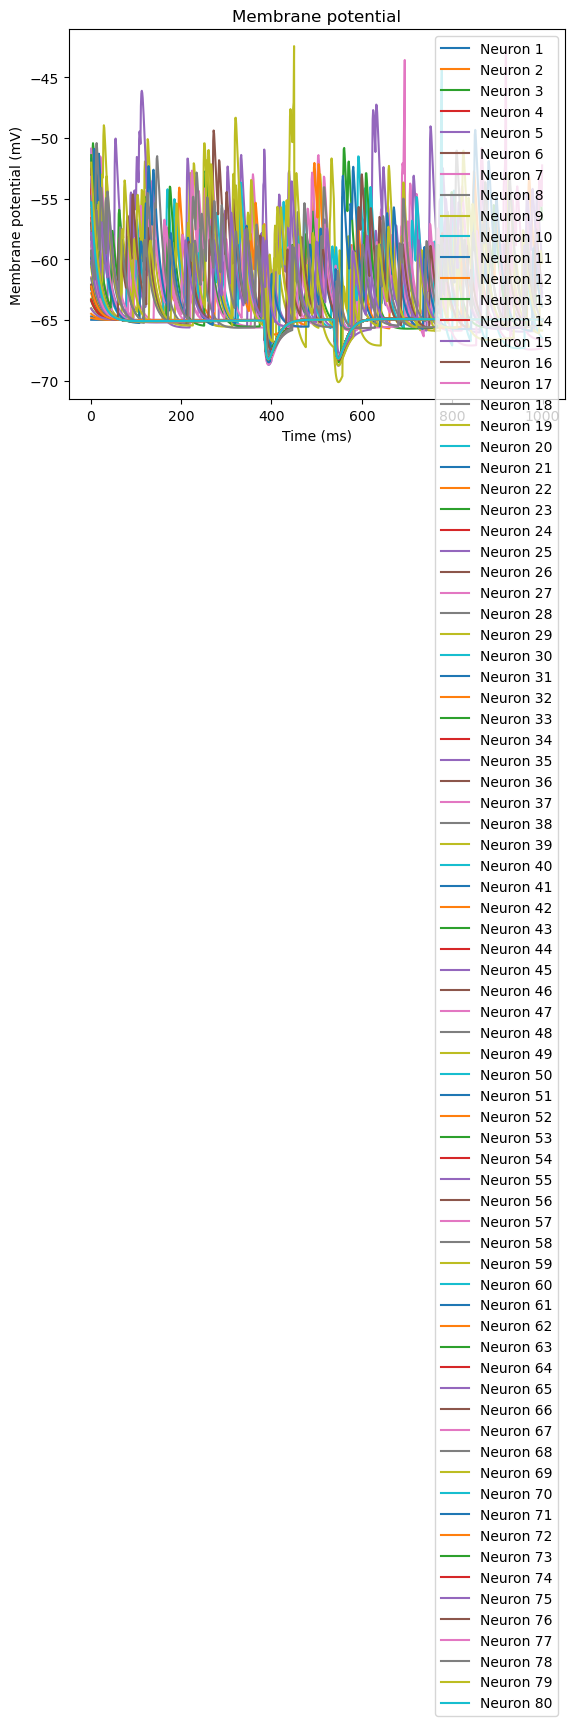

In [4]:
nest.voltage_trace.from_device(vM[0])
plt.show()

NESTError: No events recorded!

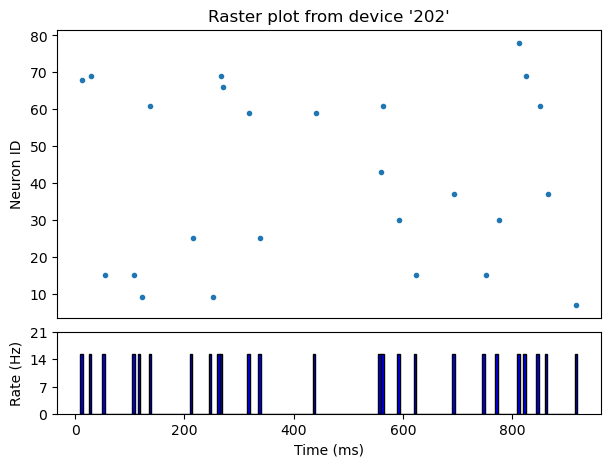

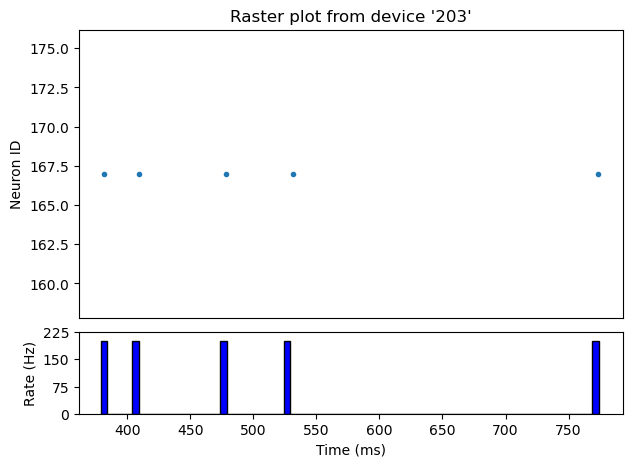

In [8]:
nest.raster_plot.from_device(E1spk)
nest.raster_plot.from_device(I1spk)
nest.raster_plot.from_device(E2spk)
nest.raster_plot.from_device(I2spk)